In [1]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

# pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from torchvision.io import read_image, ImageReadMode

import models
from models import VanillaVAE

import itertools

In [2]:
device = torch.device("cpu")

In [3]:
# Adapt to 4 channels

transforms_train = A.Compose([
        A.Flip(),
        A.Rotate(),
        ToTensorV2()
    ])

transforms_val = A.Compose([
        ToTensorV2()
    ])

NameError: name 'A' is not defined

In [3]:
class ImageDataset(Dataset):
    
    def __init__(self, root_dir='sprites/processed_sprites', transform = None):
        
        self.root_dir = Path(root_dir)
        self.image_list = list(self.root_dir.glob('*.png'))
        self.transform = transform
        
    def __len__(self):
        return len(self.image_list)
    
    def __getitem__(self, idx):
        
        img_path = self.image_list[idx]
        img = read_image(str(img_path), ImageReadMode.RGB_ALPHA)
        img = transforms.Resize((64,64)).forward(img)
               
        if self.transform is not None:
            img = self.transform(img)
        
        
        img = img/255
        img = img.float().to(device)

        return img

In [4]:
dataset = ImageDataset()

In [6]:
loader = DataLoader(dataset, batch_size=1)

/tmp/ipykernel_167695/2630530188.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


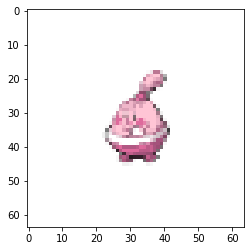

In [7]:
for im in loader:
    fig, ax = plt.subplots()
    ax.imshow(im[0].permute(1,2,0))
    fig.show()
    break

In [5]:
BATCH_SIZE = 32

loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

In [51]:
model = models.VanillaVAE(input_shape=(4,64,64), latent_dim=128, hidden_dims=[64, 256, 512])

In [52]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

Epoch 0
Loss: 0.6454930305480957


/tmp/ipykernel_136114/1982707664.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_rec.show()


Loss: 0.21611222624778748
Epoch 1
Loss: 0.1951039433479309
Loss: 0.14024671912193298
Epoch 2
Loss: 0.13478334248065948
Loss: 0.12846603989601135
Epoch 3
Loss: 0.10524501651525497
Loss: 0.1200367882847786
Epoch 4
Loss: 0.11009614169597626
Loss: 0.12152869999408722
Epoch 5
Loss: 0.13259387016296387
Loss: 0.11077156662940979
Epoch 6
Loss: 0.10134121030569077
Loss: 0.11198431998491287
Epoch 7
Loss: 0.12348946928977966
Loss: 0.09600484371185303
Epoch 8
Loss: 0.09469001740217209
Loss: 0.09578576683998108
Epoch 9
Loss: 0.11095202714204788
Loss: 0.09227585792541504


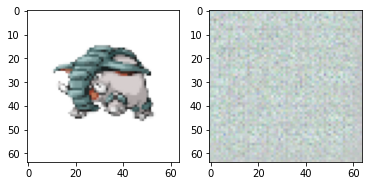

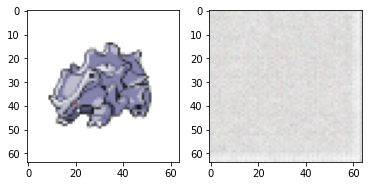

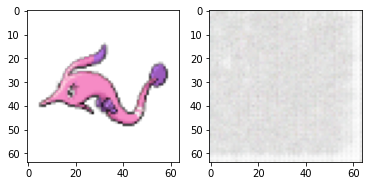

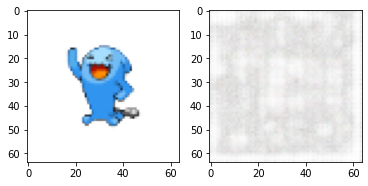

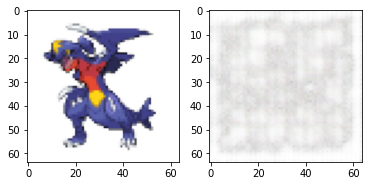

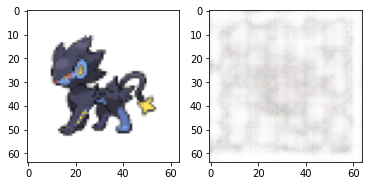

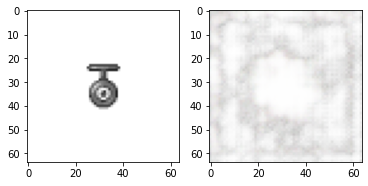

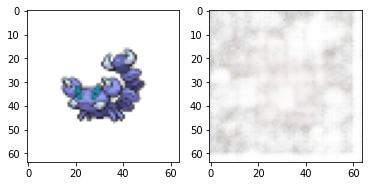

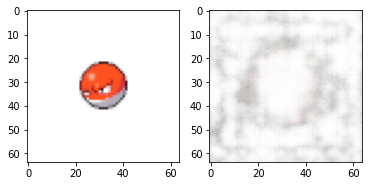

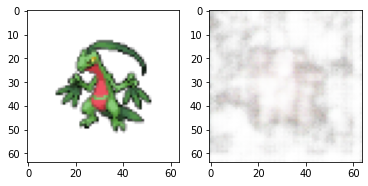

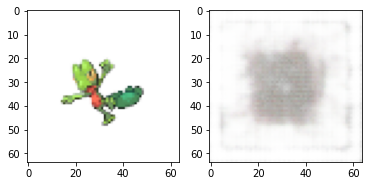

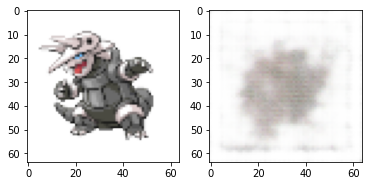

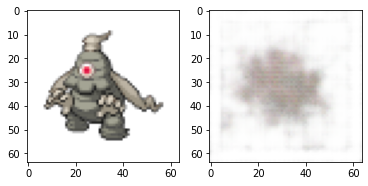

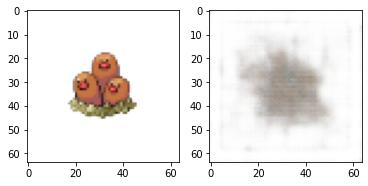

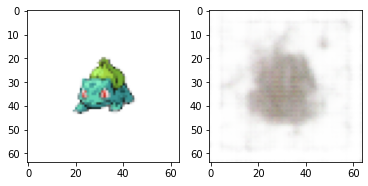

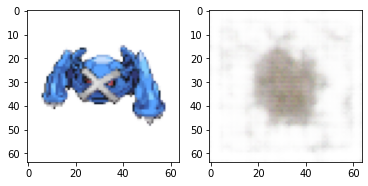

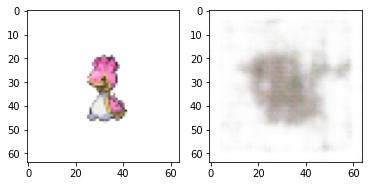

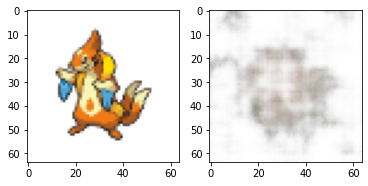

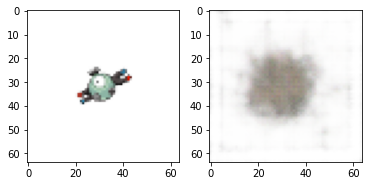

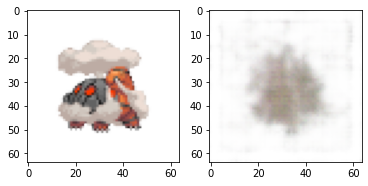

In [55]:
for epoch in range(10):
    print('Epoch {}'.format(epoch))
    for batch_idx, im in enumerate(loader):
        optimizer.zero_grad()
        results = model.forward(im)
        loss = model.loss_function(*results,
                                  M_N=BATCH_SIZE/len(dataset))
        loss['loss'].backward()
        
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.5)
        optimizer.step()


        if batch_idx % 40 == 0:
            print('Loss: {}'.format(loss['loss'].item()))
            fig_rec, ax_rec = plt.subplots(1,2)
            ax_rec[0].imshow(im[0].permute(1,2,0))
            ax_rec[1].imshow(model.generate(im[:1])[0].detach().clip(0,1).permute(1,2,0))
            fig_rec.show()

            #samples = model.sample(4, 'cpu').detach().clip(0,1)
            #fig_samples, ax_samples = plt.subplots(2,2)
            #for i, j in itertools.product(range(2), range(2)):
            #    ax_samples[i, j].imshow(samples[i+j].permute(1,2,0))
            #fig_samples.show()

In [54]:
model.conv_out_shape

torch.Size([1, 512, 8, 8])

In [56]:
import gc
gc.collect()

106903